# Data Exploration
Data exploration is a crucial step in the data analysis process. It involves examining the dataset to understand its structure, contents, and relationships. This step helps in identifying patterns, detecting anomalies, and forming hypotheses for further analysis. Key activities in data exploration include:

- **Descriptive Statistics**: Summarizing the main features of the dataset using measures such as mean, median, mode, standard deviation, and variance.
- **Data Visualization**: Creating visual representations of the data, such as histograms, scatter plots, and box plots, to identify trends and patterns.
- **Missing Data Analysis**: Identifying and handling missing values in the dataset.
- **Correlation Analysis**: Examining the relationships between different variables in the dataset.

By thoroughly exploring the data, we can gain valuable insights and make informed decisions for subsequent data processing and modeling steps.

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
figures_dir = Path("../../results/figures")
figures_dir.mkdir(parents = True,exist_ok=True)

In [3]:
# Add the project root directory to the Python path
project_root = Path().resolve().parent.parent
sys.path.append(str(project_root))
# Load the data
data_path = project_root / 'data' / 'raw'
data_train = pd.read_csv(data_path / 'train.csv')
data_test = pd.read_csv(data_path / 'test.csv')
data_train_targets = pd.read_csv(data_path / 'train_targets.csv')

In [4]:
# Explore the data
print("--- Training data shape: ", data_train.shape)
print(data_train.head())
print("--- Test data shape: ", data_test.shape)

--- Training data shape:  (742, 19921)
  Unnamed: 0      A1BG       A1CF       A2M     A2ML1   A3GALT2     A4GALT  \
0        CL1  1.672481  45.412546  9.377504  0.860362  0.156075   0.358733   
1        CL2  0.545643  15.886006  0.126553  0.731387  0.000000   3.006263   
2        CL3  1.652956   0.464895  0.353668  0.196430  0.000000  11.393572   
3        CL4  0.795200   0.182806  0.534622  0.239157  0.027417  20.203002   
4        CL5  9.983922   0.222700  0.451019  0.152793  0.233698   1.174855   

      A4GNT       AAAS        AACS  ...       ZW10      ZWILCH       ZWINT  \
0  0.013006  90.484463  119.760414  ...  38.069286  118.897181  201.401740   
1  0.015819  43.455131   37.971081  ...  40.892433   72.780020   95.990439   
2  0.408079  86.349518   35.893872  ...  14.024315   33.830939   59.865191   
3  0.342707  74.806003   56.297983  ...  18.122326   56.826586  120.221485   
4  0.068735  53.228255   36.978543  ...  47.234577   63.179324   89.121585   

        ZXDA       ZXDB

In [5]:
print("--- Training targets shape: ", data_train_targets.shape)
print(data_train_targets.head())

--- Training targets shape:  (742, 3)
  sample       AAC                 tissue
0    CL1  0.050705               Prostate
1    CL2  0.163113      Esophagus/Stomach
2    CL3  0.236655  Bladder/Urinary Tract
3    CL4  0.270218  Bladder/Urinary Tract
4    CL5  0.071619              CNS/Brain


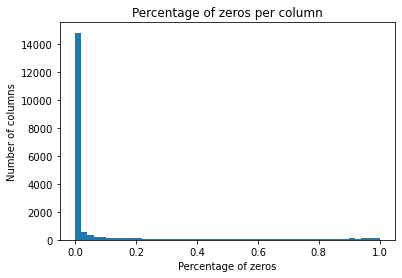

AC003002.1    0.907008
AC005697.1    0.915094
AC005837.2    0.924528
AC007375.2    0.924528
AC008878.2    0.932615
                ...   
VN1R4         0.977089
WFDC9         0.932615
Z82190.2      0.927224
ZCCHC13       0.975741
ZNF705B       0.912399
Length: 507, dtype: float64
Percentage of columns with more than 80% zeros:  0.02545052959188796


In [6]:
# Plot percentage of samples == 0  per columns
percentage_zeros = (data_train == 0).mean()
percentage_zeros.plot(kind='hist', bins=50)
plt.xlabel('Percentage of zeros')
plt.ylabel('Number of columns')
plt.title('Percentage of zeros per column')
plt.savefig(figures_dir / 'percentage_zeros_per_column.png')
plt.show()
# Print all columns with more than 80% zeros
print(percentage_zeros[(percentage_zeros > 0.9) & (percentage_zeros < 1)])
# print the percentage of columns with more than 80% zeros
print('Percentage of columns with more than 80% zeros: ', ((percentage_zeros > 0.9) & (percentage_zeros < 1)).mean())

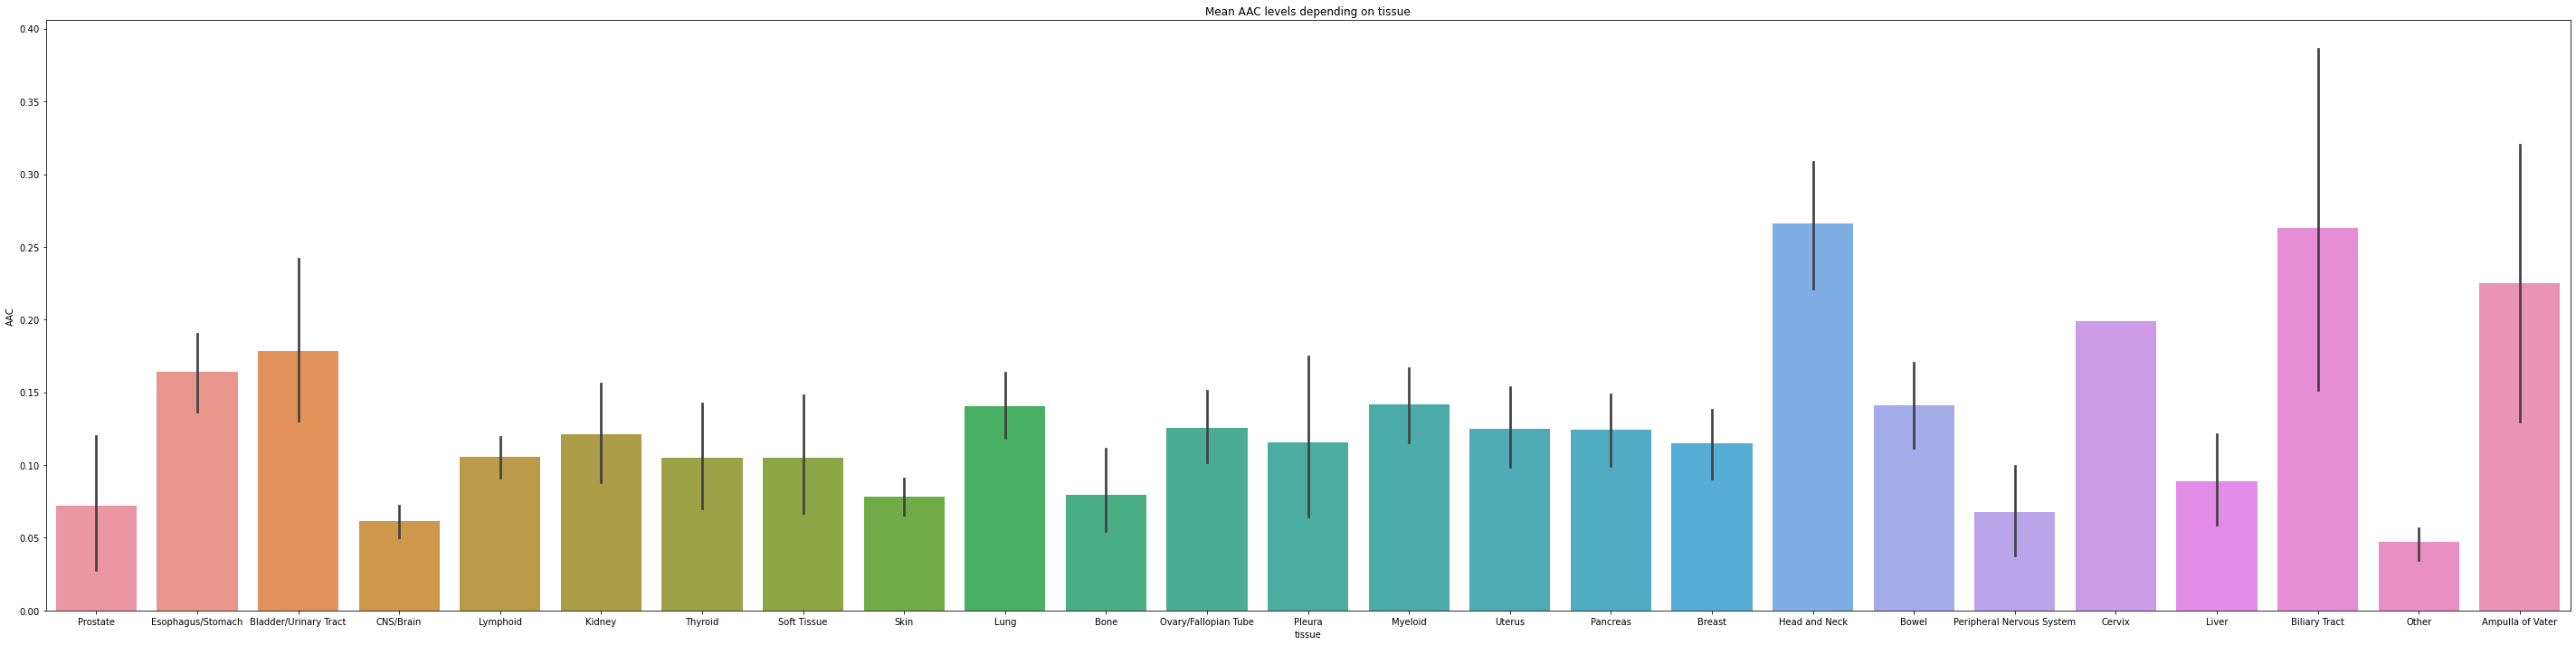

In [7]:
# plot the mean AAC levels depending on tissue
plt.figure(figsize=(50, 12))
sns.barplot(x="tissue", y="AAC", data=data_train_targets)
plt.title("Mean AAC levels depending on tissue")
plt.savefig(figures_dir / 'mean_AAC_levels_per_tissue.png')
plt.show()

In [8]:
# Check for nan values
print("--- Training data nan values: ", data_train.isna().sum().sum())
print("--- Training targets nan values: ", data_train_targets.isna().sum().sum())
print("--- Test data nan values: ", data_test.isna().sum().sum())

--- Training data nan values:  0
--- Training targets nan values:  0
--- Test data nan values:  0


In [9]:
# Check for empty columns
print("--- Training data empty columns: ", data_train.columns[data_train.isna().all()].tolist())
print("--- Test data empty columns: ", data_test.columns[data_test.isna().all()].tolist())

--- Training data empty columns:  []
--- Test data empty columns:  []


In [10]:


# Vérifier si les données sont standardisées (moyenne = 0, écart-type = 1) pour chaque caractéristique
print("--- Training data mean: ", data_train.mean().mean())
print("--- Training data std: ", data_train.std().mean())

--- Training data mean:  47.94410686383452
--- Training data std:  40.55464823618729


/var/folders/gq/01wd3qp173d43h5n7q75rykc0000gn/T/ipykernel_82794/331117980.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("--- Training data mean: ", data_train.mean().mean())
/var/folders/gq/01wd3qp173d43h5n7q75rykc0000gn/T/ipykernel_82794/331117980.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("--- Training data std: ", data_train.std().mean())


# What is AAC (Area Above the Curve)?

**AAC (Area Above the Curve)** is a metric used in pharmacology to measure the effectiveness of a drug on cancer cell lines or tumor models. It represents the area above the dose-response curve, indicating how a specific cell line responds to a given drug over a range of concentrations.

In drug testing, various concentrations of a drug (like Erlotinib, in this case) are applied to cancer cell lines, and the response is measured. AAC captures the drug's ability to inhibit cell growth:

- **Higher AAC values**: These suggest a stronger response, meaning the drug is more effective in inhibiting cell growth at lower concentrations.
- **Lower AAC values**: These imply a weaker response, indicating that higher drug concentrations are needed to achieve cell inhibition.


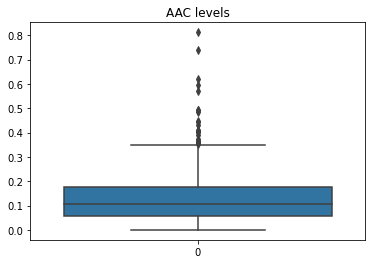

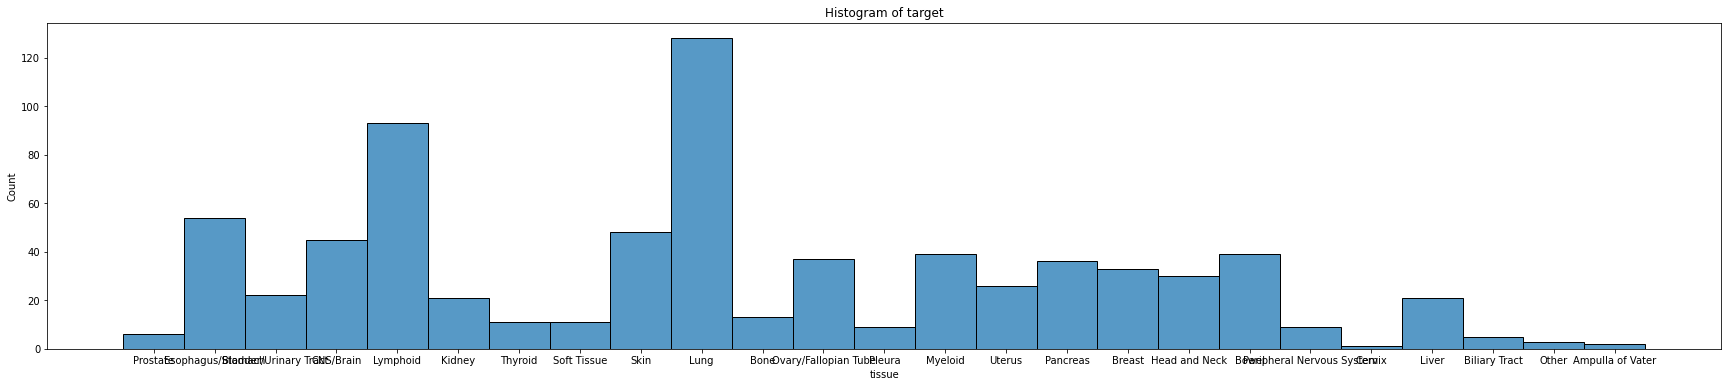

--- Percentage of outliers:  0.03099730458221024


In [11]:
# Plot first column of target as box plot
plt.figure()
sns.boxplot(data=data_train_targets.iloc[:, 1])
plt.title('AAC levels')
plt.savefig(figures_dir / 'boxplot_AAC_levels.png')
plt.show()
# Plot second column as histogram
plt.figure(figsize=(30, 6))
sns.histplot(data_train_targets.iloc[:, 2], bins=30)
plt.title('Histogram of target')
plt.savefig(figures_dir / 'histogram_target.png')
plt.show()
# print number of outliers in percentage
Q1 = data_train_targets.iloc[:, 1].quantile(0.25)
Q3 = data_train_targets.iloc[:, 1].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_train_targets.iloc[:, 1] < (Q1 - 1.5 * IQR)) | (data_train_targets.iloc[:, 1] > (Q3 + 1.5 * IQR))).mean()
print("--- Percentage of outliers: ", outliers)


# Correlation

In [12]:
from src.utils.utils import load_data

# Use the function
data_train_proc, data_test_proc, data_train_targets_proc = load_data(raw = False)


2024-12-14 18:23:36.323826: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Compute the correlation matrix for the selected 1000 features
corr_matrix = data_train_proc.corr()

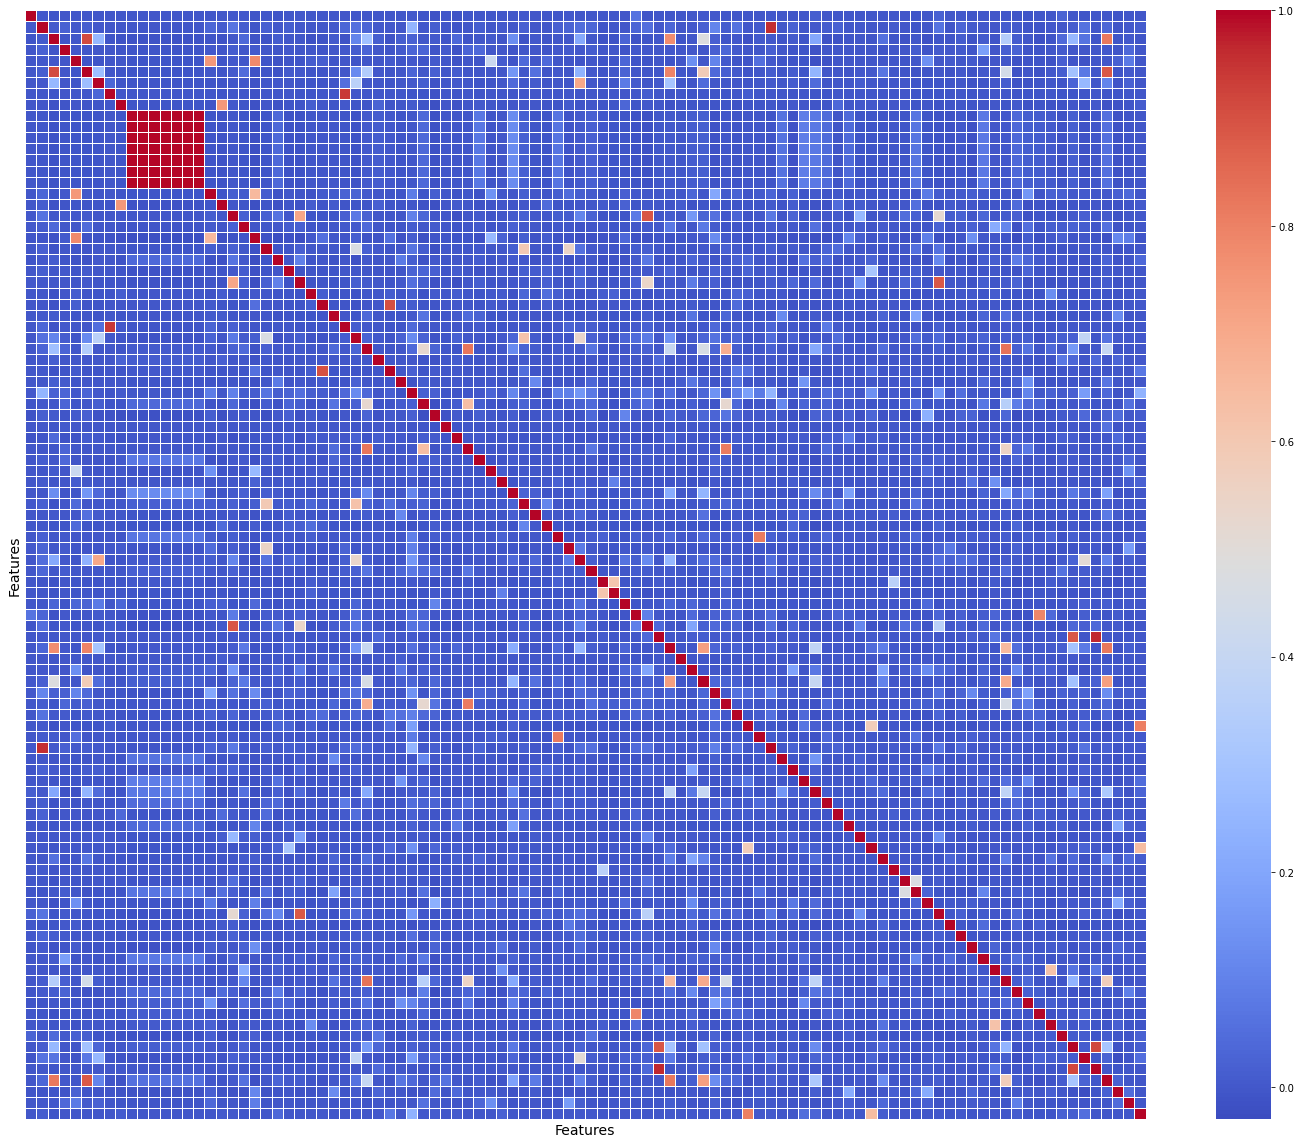

In [28]:
# Select the top 100 features based on variance
top_100_features = data_train_proc.var().sort_values(ascending=True).head(100).index
# Slice the correlation matrix to include only the top 100 features for plotting
corr_matrix_trunc = corr_matrix.loc[top_100_features, top_100_features]

# Plot the heatmap for the top 1000 features
plt.figure(figsize=(20, 16))  # Adjust figure size to make it more manageable
sns.heatmap(corr_matrix_trunc, 
            cmap="coolwarm", 
            fmt='.2f', 
            linewidths=0.5, 
            xticklabels=False, 
            yticklabels=False)  # Add label to the color bar

plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.savefig(figures_dir / 'correlation_heatmap_1000_features.png', dpi=300)  # High-resolution output
plt.show()

In [ ]:
# Set threshold
threshold = 0.9

# Mask diagonal and filter features
mask = np.triu(np.ones(corr_matrix.shape), k=1)  # Upper triangle mask, excluding diagonal
high_corr_indices = np.where((corr_matrix > threshold) & mask)

# Get all unique features involved in correlations
print("--- Number of correlated features: ", len(np.unique(high_corr_indices[0])), " X ", len(np.unique(high_corr_indices[1])))

--- Number of correlated features:  704  X  710


In [16]:
# Vérifier si les données sont standardisées (moyenne = 0, écart-type = 1) pour chaque caractéristique
print("--- Training data mean: ", data_train_proc.mean().mean())
print("--- Training data std: ", data_train_proc.std().mean())
# Check for nan values
print("--- Training data nan values: ", data_train_proc.isna().sum().sum())
print("--- Training targets nan values: ", data_train_targets_proc.isna().sum().sum())
print("--- Test data nan values: ", data_test_proc.isna().sum().sum())

--- Training data mean:  1.1792705925055731e-17
--- Training data std:  1.000674536333047
--- Training data nan values:  0
--- Training targets nan values:  0
--- Test data nan values:  0


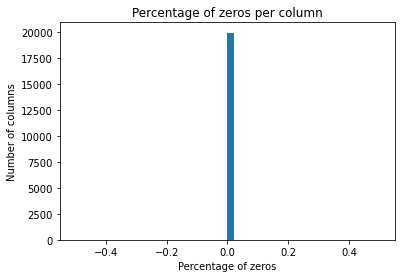

Series([], dtype: float64)


In [17]:
# Plot percentage of samples == 0  per columns
percentage_zeros = (data_train_proc == 0).mean()
percentage_zeros.plot(kind='hist', bins=50)
plt.xlabel('Percentage of zeros')
plt.ylabel('Number of columns')
plt.title('Percentage of zeros per column')
plt.show()
# Print all columns with more than 90% zeros
print(percentage_zeros[percentage_zeros > 0.9])

# PCA Analysis

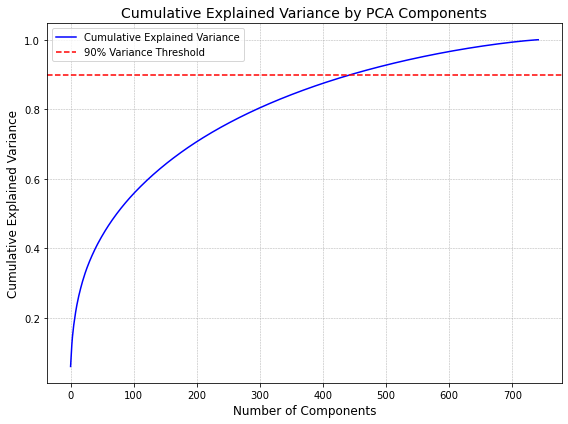

In [18]:
# Assuming data_train_proc is already defined
pca = PCA()
pca.fit(data_train_proc)
explained_variance_ratio = pca.explained_variance_ratio_

# Improved plot
plt.figure(figsize=(8, 6))
plt.plot(
    np.cumsum(explained_variance_ratio), 
    linestyle='-', 
    color='b', 
    label='Cumulative Explained Variance'
)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance by PCA Components', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig(figures_dir / 'cumulative_explained_variance.png')
plt.show()


In [19]:
# print the number of components needed to explain 90% of the variance
explained_variance_ratio_cumsum = np.cumsum(explained_variance_ratio)
n_components = np.argmax(explained_variance_ratio_cumsum > 0.9) + 1
print("--- Number of components needed to explain 90% of the variance: ", n_components)

--- Number of components needed to explain 90% of the variance:  446


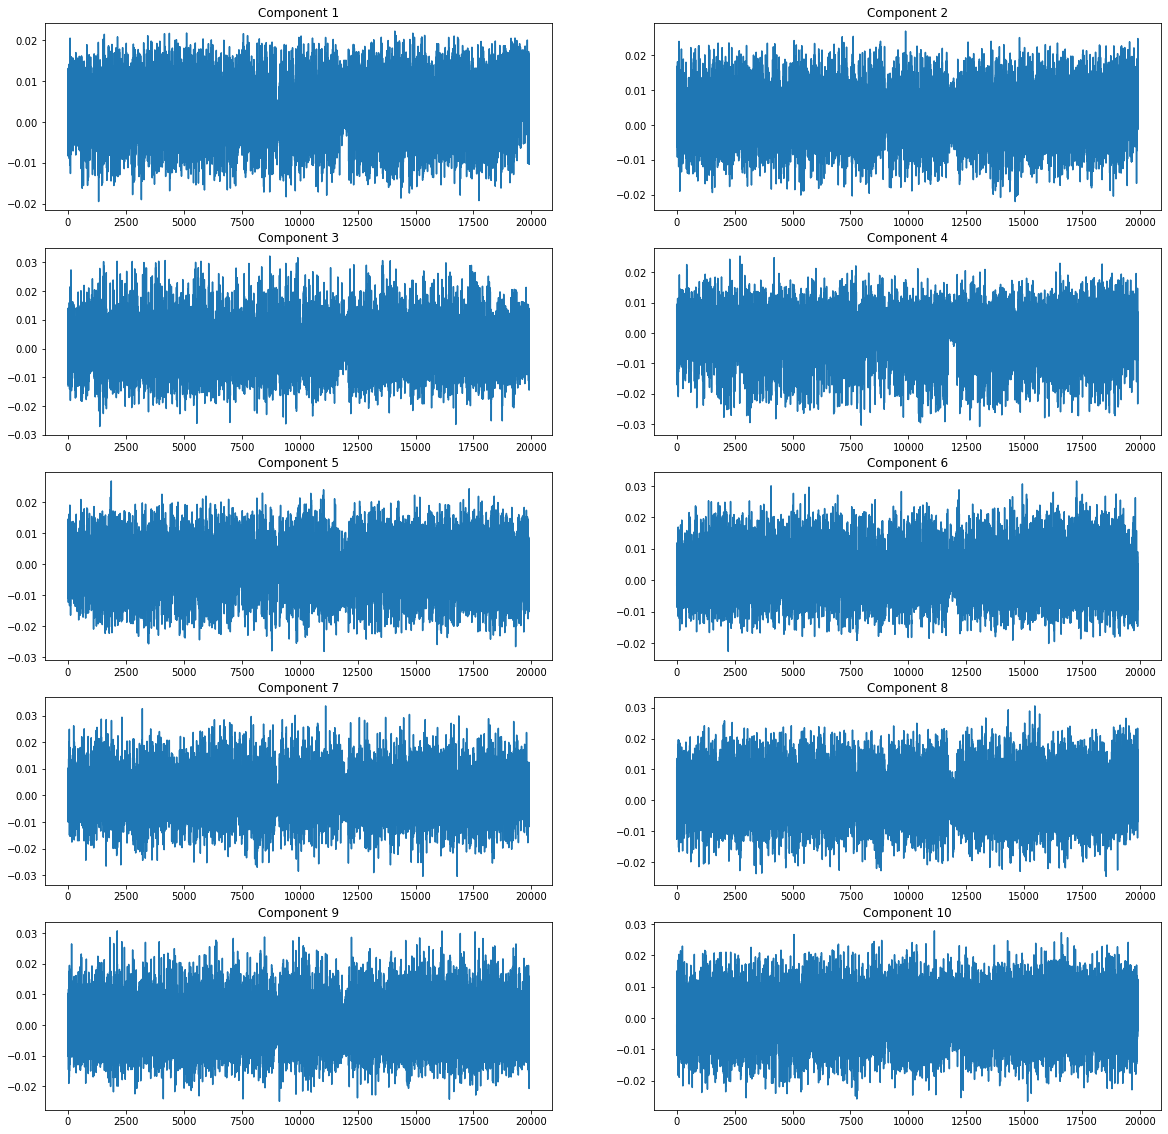

Component  1 :  [14885  5119 14108]
Component  2 :  [7144 7619 9879]
Component  3 :  [4191 9917 8709]
Component  4 :  [10519  7963 13075]
Component  5 :  [ 1868  8798 11053]


In [20]:
# Plot the main values of the 5 first componenets
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.plot(pca.components_[i])
    plt.title('Component ' + str(i+1))
plt.savefig(figures_dir / 'pca_components.png')
plt.show()
# Print the three biggest values of each component
for i in range(5):
    print("Component ", i+1, ": ", np.argsort(np.abs(pca.components_[i]))[-3:])

